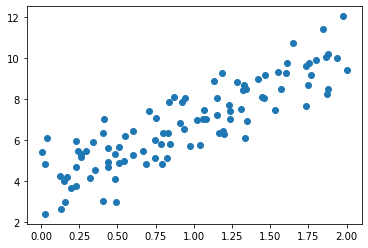

In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#----------- Generating data for training -------------#
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)
plt.scatter(X,y)

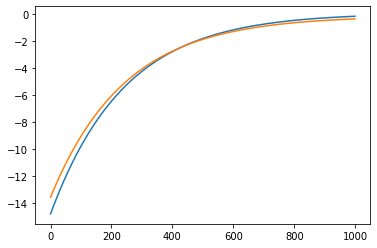

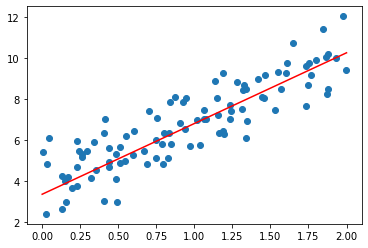

In [93]:
#-------------Linear Regression using gradient descent algo(for 2 variable) --------------#
m=0
c=0
lr=0.001
epochs=1000
n=float(len(X))
m_hist=[]
c_hist=[]
for i in range(epochs):
    y_pred=m*X+c
    gradient_m=(-2/n)*sum(X * (y - y_pred))
    gradient_c=(-2/n)*sum(y - y_pred)
    m=m-lr*gradient_m
    c=c-lr*gradient_c
    m_hist.append(gradient_m)
    c_hist.append(gradient_c)
#length=len(m_hist)
plt.plot(m_hist)
plt.plot(c_hist)
plt.figure()
plt.scatter(X,y)
plt.plot([0,2],[m*0+c,m*2+c],'r')

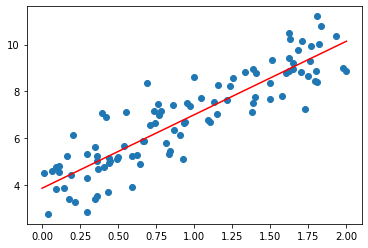

In [37]:
#-------------Linear Regression using gradient descent using linear regression model in sklearn--------------#
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X,y)
pred_y0=linreg.predict(np.array([0]).reshape(1,-1))
pred_y2=linreg.predict(np.array([2]).reshape(1,-1))
plt.scatter(X,y)
plt.plot([0,2],[pred_y0[0][0],pred_y2[0][0]],'r')

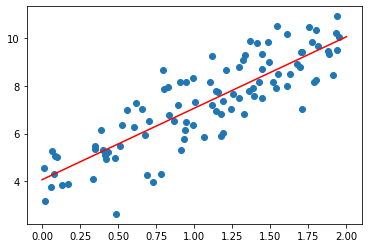

In [62]:
#-------------Linear Regression using Normal Equation--------------#

X_b=np.c_[np.ones((100,1)),X] # Adding bias term x0 for w0
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
plt.scatter(X,y)
plt.plot([0,2],[theta_best[0][0],theta_best[0][0]+theta_best[1][0]*2],'r')

[[2.82601367]
 [3.17744385]]


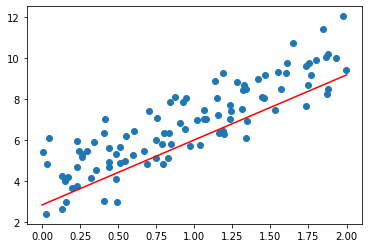

In [88]:
#-------------Linear Regression using gradient descent algo(suitable for multi variable) --------------#
import time
alp=0.01
n=100
m=float(len(X))
theta_GD=np.random.randn(2,1)
for i in range(n):
    gradient=2/m*X_b.T.dot(X_b.dot(theta_GD)-y)
    theta_GD=theta_GD-alp*gradient
plt.scatter(X,y)
plt.plot([0,2],[theta_GD[0][0],theta_GD[0][0]+theta_GD[1][0]*2],'r')
print(theta_GD)

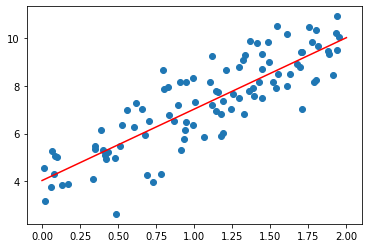

In [64]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(penalty=None,eta0=0.1,max_iter=50)
sgd.fit(X,y)
plt.scatter(X,y)
plt.plot([0,2],[sgd.predict([[0]]),sgd.predict([[2]])],'r')

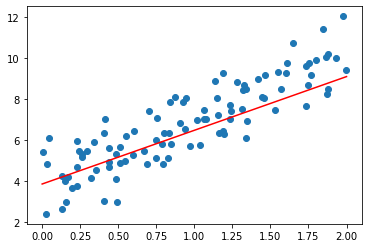

In [82]:
n_epochs=10
m=np.random.random()
c=np.random.random()
n=float(len(X))
eta=0.1
X_temp=X.copy()
for i in range(n_epochs):
    np.random.shuffle(X_temp)
    for j in range(len(X_temp)):
        y_pred=m*X_temp[j]+c
        gradient_m=(-2/n)*sum(X_temp[j] * (y[j] - y_pred))
        gradient_c=(-2/n)*sum(y[j] - y_pred)
        m=m-eta*gradient_m
        c=c-eta*gradient_c
plt.scatter(X,y)
plt.plot([0,2],[m*0+c,m*2+c],'r')

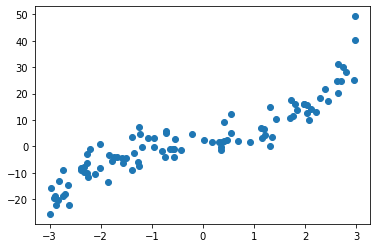

In [10]:
poly_X=6*np.random.rand(100,1)-3
poly_y=1*poly_X**3+0.5*poly_X**2+poly_X+2+4*np.random.randn(100,1)
plt.scatter(poly_X,poly_y)

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3,include_bias=False)
X_poly=poly.fit_transform(poly_X)

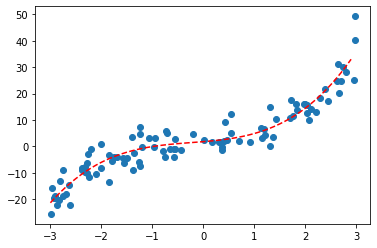

In [12]:
linreg.fit(X_poly,poly_y)
plt.scatter(poly_X,poly_y)
X_plot=np.arange(-3,3,0.1)
y_plot=[]
for i in X_plot:
    X0=poly.fit_transform([[i]])
    pred=linreg.predict(X0)
    y_plot.append(pred[0][0])
plt.plot(X_plot,y_plot,'r--') 

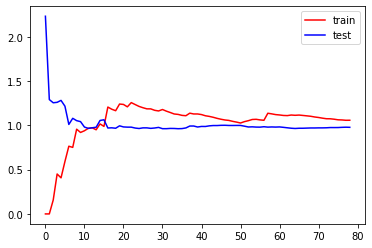

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(X,y,model):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    train_err,test_err=[],[]
    for i in range(1,len(X_train)):
        model.fit(X_train[:i],y_train[:i])
        train_pred=model.predict(X_train[:i])
        test_pred=model.predict(X_test)
        train_err.append(np.sqrt(mean_squared_error(y_train[:i],train_pred)))
        test_err.append(np.sqrt(mean_squared_error(y_test,test_pred)))
    plt.plot(train_err,'r',label='train')
    plt.plot(test_err,'b',label='test')
    plt.legend()
plot_learning_curve(X,y,linreg)

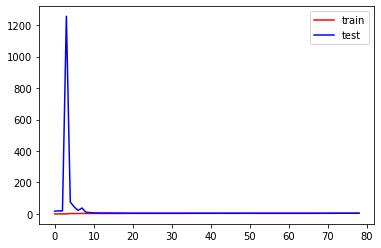

In [14]:
plot_learning_curve(X_poly,poly_y,linreg)

In [15]:
from sklearn.linear_model import Ridge
poly=PolynomialFeatures(degree=10,include_bias=False)
X_poly=poly.fit_transform(poly_X)
rdg_reg=Ridge(alpha=10,solver='cholesky')
rdg_reg.fit(X_poly,poly_y)

Ridge(alpha=10, solver='cholesky')

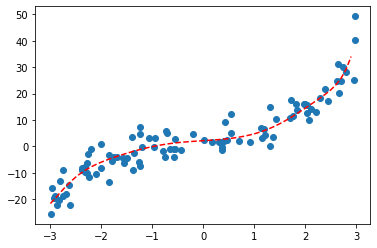

In [16]:
plt.scatter(poly_X,poly_y)
y_plot=[]
for i in X_plot:
    X0=poly.fit_transform([[i]])
    pred=rdg_reg.predict(X0)
    y_plot.append(pred[0][0])
plt.plot(X_plot,y_plot,'r--')    

In [17]:
from sklearn.linear_model import Lasso

las_reg=Lasso(alpha=1,max_iter=1000000)
las_reg.fit(X_poly,poly_y)

Lasso(alpha=1, max_iter=1000000)

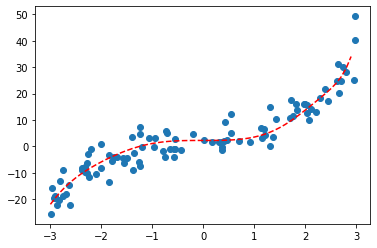

In [18]:
plt.scatter(poly_X,poly_y)
y_plot=[]
for i in X_plot:
    X0=poly.fit_transform([[i]])
    pred=las_reg.predict(X0)
    y_plot.append(pred[0])
plt.plot(X_plot,y_plot,'r--')    

In [19]:
from sklearn.linear_model import ElasticNet

enet_reg=ElasticNet(alpha=1,l1_ratio=0.5,max_iter=100000)
enet_reg.fit(X_poly,poly_y)

ElasticNet(alpha=1, max_iter=100000)

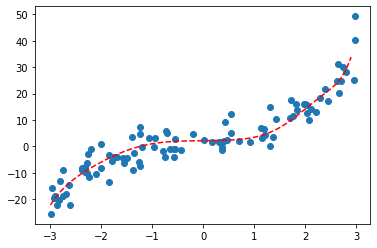

In [20]:
plt.scatter(poly_X,poly_y)
y_plot=[]
for i in X_plot:
    X0=poly.fit_transform([[i]])
    pred=enet_reg.predict(X0)
    y_plot.append(pred[0])
plt.plot(X_plot,y_plot,'r--')    

In [21]:
from sklearn.base import clone
sgd=SGDRegressor(warm_start=True,penalty=None,learning_rate='constant',eta0=0.05)
min_error=float('inf')
best_epoch=None
best_reg=None
X_train_poly,X_test_poly,y_train_poly,y_test_poly=train_test_split(poly_X,poly_y)
poly_X_train=poly.fit_transform(X_train_poly)
poly_X_test=poly.fit_transform(X_test_poly)
for epoch in range(1000):
    sgd.fit(poly_X_train,y_train_poly.ravel())
    pred_y=sgd.predict(poly_X_test)
    err=mean_squared_error(y_test_poly,pred_y)
    if err<min_error:
        min_error=err
        best_epoch=epoch
        best_reg=clone(sgd)

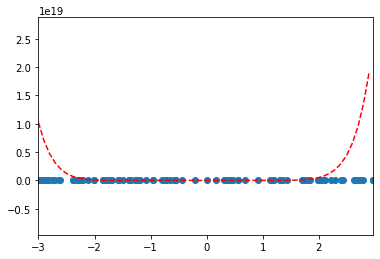

In [22]:
best_reg.fit(X_poly,poly_y.ravel())
plt.scatter(poly_X,poly_y)
y_plot=[]
for i in X_plot:
    X0=poly.fit_transform([[i]])
    pred=best_reg.predict(X0)
    y_plot.append(pred[0])
plt.plot(X_plot,y_plot,'r--')
plt.margins(x=0,y=0.5)

In [23]:
from sklearn import datasets
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
from sklearn.linear_model import LogisticRegression
X=iris['data'][:,3:]
y=(iris['target']==2).astype(np.int)
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

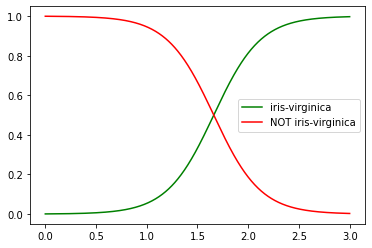

In [25]:
X_=np.linspace(0,3,1000).reshape(-1,1)
proba=log_reg.predict_proba(X_)
plt.plot(X_,proba[:,1],'g',label='iris-virginica')
plt.plot(X_,proba[:,0],'r',label='NOT iris-virginica')
plt.legend()

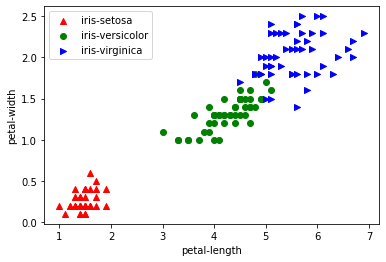

In [26]:
X=iris['data'][:,2:]
log_reg.fit(X,y)
plot_2=[]
plot_1=[]
plot_0=[]
cond=iris['target']
for i in range(150):
    if cond[i]==0:
        plot_0.append(X[i])
    elif cond[i]==1:
        plot_1.append(X[i])
    elif cond[i]==2:
        plot_2.append(X[i])
plot_0=np.array(plot_0)
plot_1=np.array(plot_1)
plot_2=np.array(plot_2)
plt.scatter(plot_0[:,0],plot_0[:,1],marker='^',color='r',label='iris-setosa')
plt.scatter(plot_1[:,0],plot_1[:,1],marker='o',color='g',label='iris-versicolor')
plt.scatter(plot_2[:,0],plot_2[:,1],marker='>',color='b',label='iris-virginica')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.legend(loc=2)

In [27]:
y=iris['target']
softmax=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [28]:
print(softmax.predict([[5,2]]))
print(softmax.predict([[1.5,0.2]]))
print(softmax.predict([[3.5,1]]))

[2]
[0]
[1]
